In [1]:
import parse_data as ps
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = ps.get_data()

Successfully loaded 'MentalHealthSurvey.csv'


In [2]:
if df is not None:
    # Mapping
    sleep_mapping = {
        '2-4 hrs': 3.0,
        '4-6 hrs': 5.0,
        '7-8 hrs': 7.5
    }
    df['average_sleep'] = df['average_sleep'].map(sleep_mapping)
    print("Data Preprocessing: Success.")

Data Preprocessing: Success.


In [3]:
X = df[['average_sleep', 'academic_pressure']] 
y = df['depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split: Done. Training: Start.")

Data split: Done. Training: Start.


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model Training Complete.")
print(f"Train R^2 Score: {train_score:.3f}")
print(f"Test R^2 Score: {test_score:.3f}")

Model Training Complete.
Train R^2 Score: 0.162
Test R^2 Score: -0.048


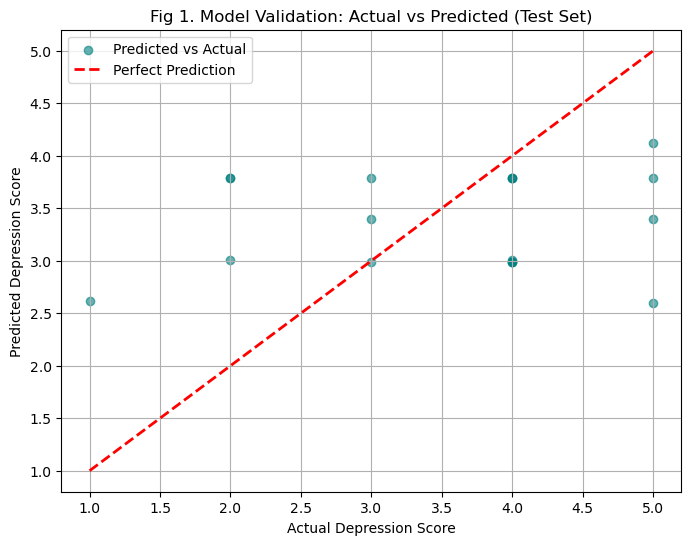

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='teal', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Depression Score")
plt.ylabel("Predicted Depression Score")
plt.title("Fig 1. Model Validation: Actual vs Predicted (Test Set)")
plt.legend()
plt.grid(True)
plt.savefig("ml_validation_plot.png") 
plt.show()

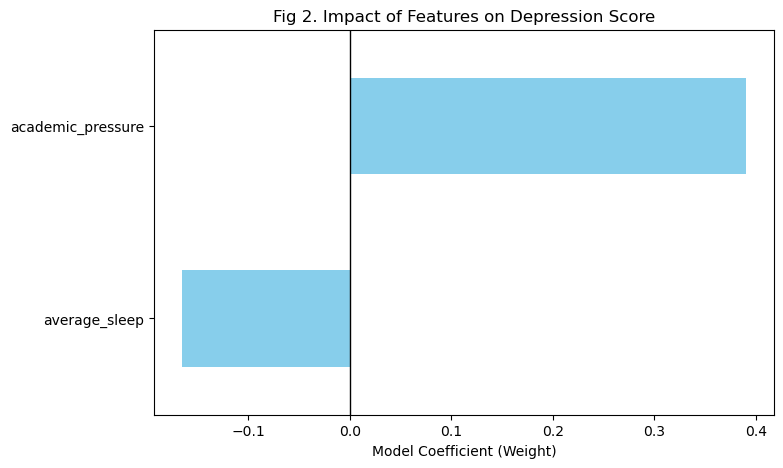

Coefficients: [-0.16541226  0.39004973]


In [6]:
importance = pd.Series(model.coef_, index=X.columns)

plt.figure(figsize=(8, 5))
importance.sort_values().plot(kind='barh', color='skyblue')
plt.axvline(0, color='black', lw=1)
plt.title("Fig 2. Impact of Features on Depression Score")
plt.xlabel("Model Coefficient (Weight)")
plt.savefig("feature_importance.png")
plt.show()

print("Coefficients:", model.coef_)